# **Laboratorijska vježba 5**: Zadaci za samostalni rad

## **Predviđanje prodaje iz troškova oglasa**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o oglasima u kojima se prodaju određeni proizvodi, a objavljuju se na medijima poput TV-a, radija i novina. Skup podataka sadrži sljedeće stupce:

* TV - cijena za oglašavanje na TV-u za jedan proizvod na određenom tržištu (u tisućama dolara).
* Radio - cijena za oglašavanje na radiju za isti proizvod.
* Newspaper - cijena za oglašavanje u novinama za isti proizvod.
* Sales - prodaja jednog proizvoda na određenom tržištu (u tisućama jedinica).



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [8]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## **Zadatak 1: Linearna regresija: predviđanje prodaje iz troškova oglasa**

Podijelite skup podataka na podskupove za trening i test. Definirajte model linearne regresije pomoću svih značajki, bez izvođenja bilo kakvih transformacija nad značajkama. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [9]:
X = data.drop('sales', axis=1)
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE on training subset: ", mse_train)

y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE on testing subset: ", mse_test)

MSE on training subset:  2.4793551789057866
MSE on testing subset:  3.79679723671522


Ispišite jednadžbu modela koristeći izračunate koeficijente.

In [10]:
feature_cols = ['TV', 'radio', 'newspaper']

equation = ""
for f in range(len(feature_cols)):
    equation += "{:.2f} * {} + ".format(model.coef_[f], feature_cols[f])
equation += "{:.2f}".format(model.intercept_)
print("sales = " + equation)

sales = 0.04 * TV + 0.20 * radio + 0.01 * newspaper + 2.71


Nacrtajte dijagram raspršenosti između stvarnih i predviđenih vrijednosti izlazne varijable za podskupove za trening i test.

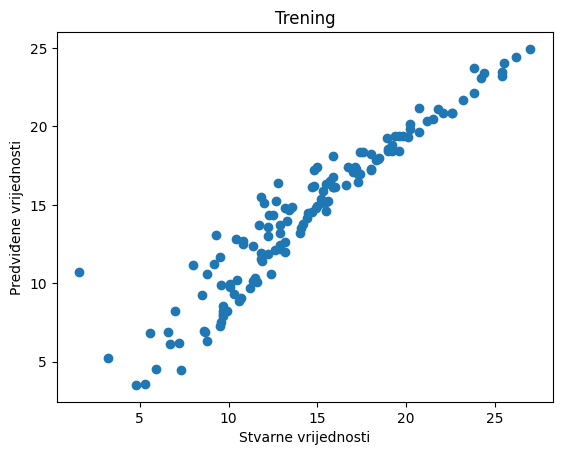

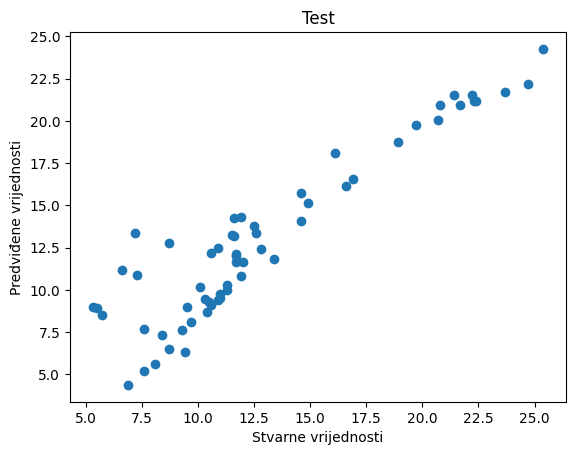

In [11]:
plt.scatter(y_train, y_train_pred)
plt.title("Trening")
plt.xlabel("Stvarne vrijednosti")
plt.ylabel("Predviđene vrijednosti")
plt.show()

plt.scatter(y_test, y_test_pred)
plt.title("Test")
plt.xlabel("Stvarne vrijednosti")
plt.ylabel("Predviđene vrijednosti")
plt.show()

## **Zadatak 2: Nelinearna regresija: predviđanje prodaje iz troškova oglasa**

Definirajte model nelinearne (polinomijalne) regresije sa stupnjem polinoma 2, 3, 5 i 10 bez uključivanja interakcijskih članova. Koristite klasu PolynomialFeatures iz modula preprocessing iz biblioteke scikit-learn. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 5, 10]

train_mse = []
test_mse = []

for degree in degrees:
    poly = PolynomialFeatures(degree)

    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression().fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    train_mse.append(mse_train)
    test_mse.append(mse_test)
    
    print(f"Stupanj: {degree}")
    print(f"MSE Trening: {mse_train}")
    print(f"MSE Test: {mse_test}\n")

Stupanj: 2
MSE Trening: 0.35410977541934024
MSE Test: 0.5231944949055658

Stupanj: 3
MSE Trening: 0.21984452631177434
MSE Test: 0.29077449153131163

Stupanj: 5
MSE Trening: 0.14980929022223635
MSE Test: 46.96618991927361

Stupanj: 10
MSE Trening: 0.02483210520179272
MSE Test: 253620947145.9207



Iscrtajte izračunate vrijednosti MSE (na treningu i testu) u ovisnosti o složenosti modela. Koristite linijski dijagram.

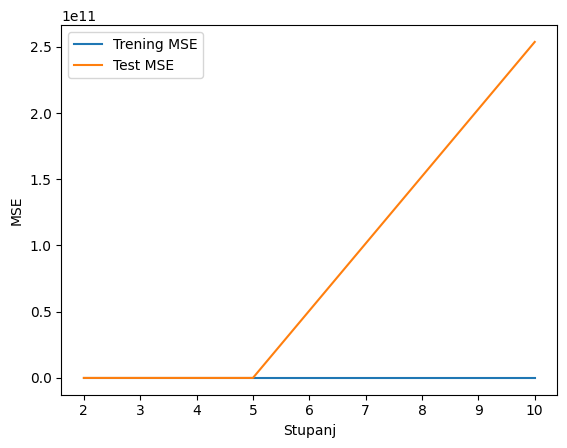

In [13]:
plt.plot(degrees, train_mse, label='Trening MSE')
plt.plot(degrees, test_mse, label='Test MSE')
plt.xlabel('Stupanj')
plt.ylabel('MSE')
plt.legend()
plt.show()

Ovaj put uključite interakcijske članove te ponovite treniranje i računanje mjere MSE.

Stupanj: 2
MSE Trening: 0.8476116596934253
MSE Test: 1.007630507076708

Stupanj: 3
MSE Trening: 0.8282466554598642
MSE Test: 1.1532864903357123

Stupanj: 5
MSE Trening: 0.8282466554598642
MSE Test: 1.1532864903357123

Stupanj: 10
MSE Trening: 0.8282466554598642
MSE Test: 1.1532864903357123



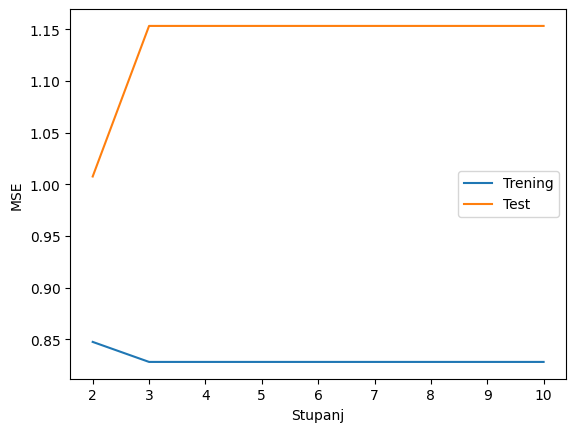

In [14]:
degrees = [2, 3, 5, 10]
mse_train = []
mse_test = []

for degree in degrees:
    poly = PolynomialFeatures(degree, interaction_only=True)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression().fit(X_poly_train, y_train)
    
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
    print(f"Stupanj: {degree}")
    print(f"MSE Trening: {mse_train[-1]}")
    print(f"MSE Test: {mse_test[-1]}\n")

plt.plot(degrees, mse_train, label='Trening')
plt.plot(degrees, mse_test, label='Test')
plt.xlabel('Stupanj')
plt.ylabel('MSE')
plt.legend()
plt.show()


Komentirajte dobivene rezultate. Koji model ima najbolje performanse na podskupu za trening, a koji na testu? Je li za ovaj problem prikladnija polinomijalna regresija od linearne regresije? Imaju li utjecaj interakcijski članovi na performanse modela?

## **Zadatak 3: Preslikavanje u prostor značajki**

Umjesto uvođenja novih (nelinearnih) značajki u model, pokušajte transformirati postojeće značajke. Za početak, za svaku značajku u skupu podataka (TV, Radio, Newspaper), vizualizirajte njezinu vezu s izlaznom varijablom (Sales) pomoću dijagrama raspršenosti. 

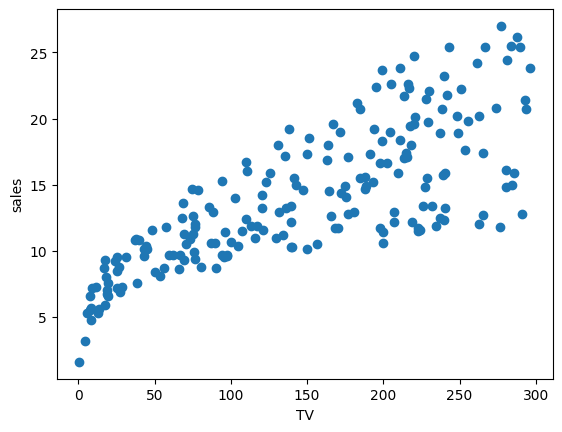

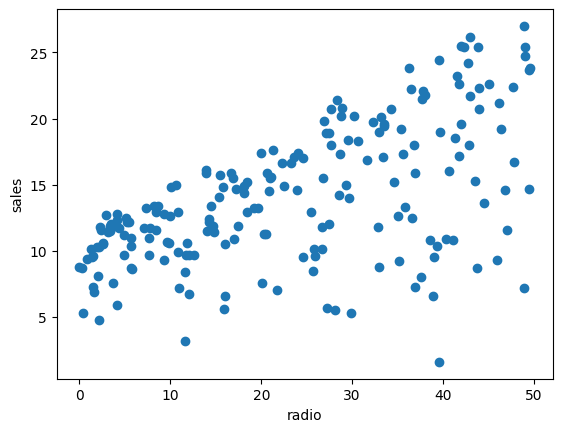

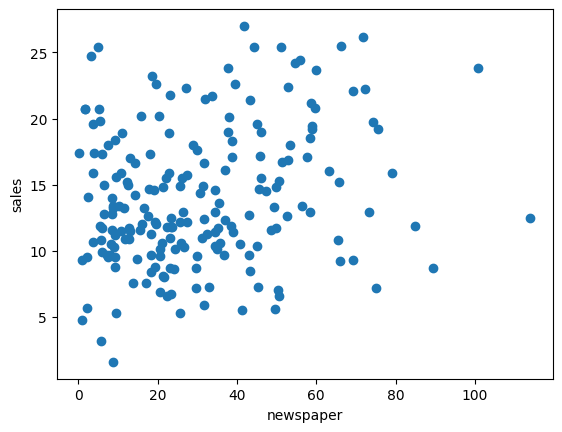

In [15]:
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

for feature in X.columns:
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel('sales')
    plt.show()

Na temelju ovih dijagrama, pokušajte zaključiti kakva je veza svake značajke i izlazne varijable. Pokušajte isprobati neke transformacije nad postojećim značajkama za koje mislite da će njihovu vezu nad izlaznom varijablom svesti u linearan oblik (primjerice, potenciranje, korjenovanje, logaritmiranje, ...).

In [16]:
tv = X['TV']

tv_log = np.log(tv)

tv_squared = np.power(tv, 2)

tv_sqrt = np.sqrt(tv)

Ponovno vizualizirajte vezu između svake (sada transformirane) značajke i izlazne varijable te provjerite je li došlo do kakvih promjena. Istrenirajte model linearne regresije s takvim značajkama te ga istrenirajte na podskupu za trening. Izračunajte MSE na podskupovima za trening i test. 

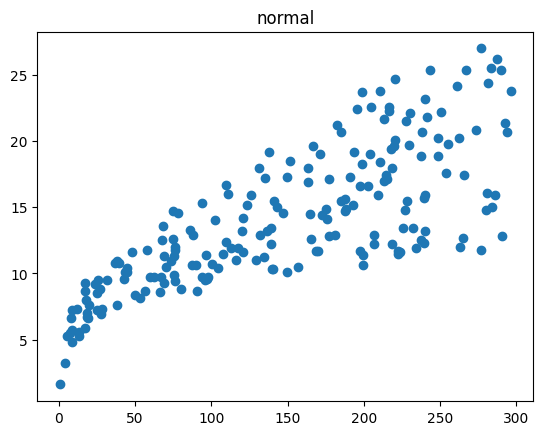

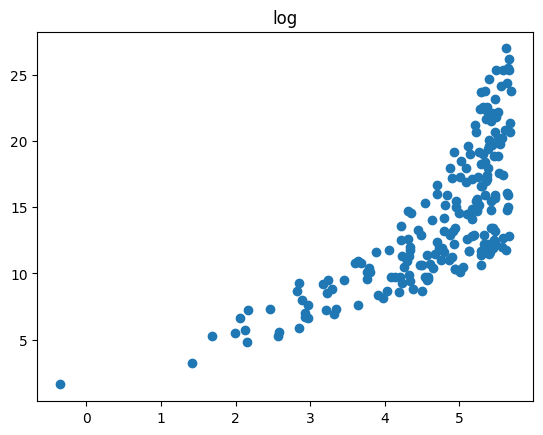

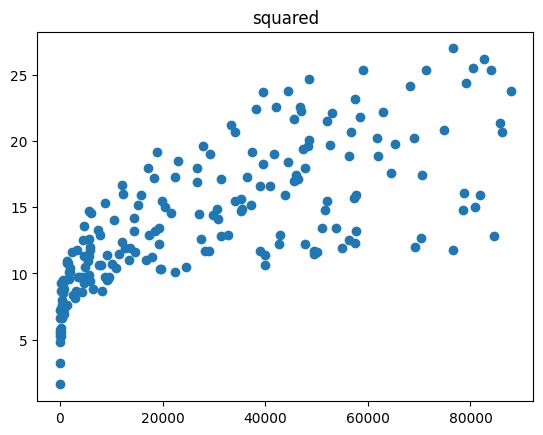

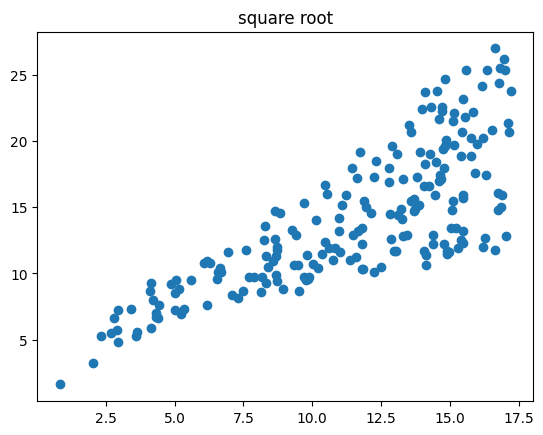

normal:
Train MSE: 1.6546000102640763
Test MSE: 2.3241392410055988


log:
Train MSE: 11.750875282280134
Test MSE: 11.882520454322146


squared:
Train MSE: 13.360762865914271
Test MSE: 10.498962935730932


root:
Train MSE: 10.555461911455296
Test MSE: 9.418838254775435




In [17]:
plt.scatter(tv, y)
plt.title('normal')
plt.show()

plt.scatter(tv_log, y)
plt.title('log')
plt.show()

plt.scatter(tv_squared, y)
plt.title('squared')
plt.show()

plt.scatter(tv_sqrt, y)
plt.title('square root')
plt.show()

X['TV_log'] = np.log(X['TV'])
X['TV_squared'] = np.power(X['TV'], 2)
X['TV_sqrt'] = np.sqrt(X['TV'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression().fit(X_train, y_train)

lr_normal = LinearRegression().fit(X_train, y_train)
lr_log = LinearRegression().fit(X_train[['TV_log']], y_train)
lr_squared = LinearRegression().fit(X_train[['TV_squared']], y_train)
lr_sqrt = LinearRegression().fit(X_train[['TV_sqrt']], y_train)

train_mse_normal = mean_squared_error(y_train, lr_normal.predict(X_train))
test_mse_normal = mean_squared_error(y_test, lr_normal.predict(X_test))

train_mse_log = mean_squared_error(y_train, lr_log.predict(X_train[['TV_log']]))
test_mse_log = mean_squared_error(y_test, lr_log.predict(X_test[['TV_log']]))

train_mse_squared = mean_squared_error(y_train, lr_squared.predict(X_train[['TV_squared']]))
test_mse_squared = mean_squared_error(y_test, lr_squared.predict(X_test[['TV_squared']]))

train_mse_sqrt = mean_squared_error(y_train, lr_sqrt.predict(X_train[['TV_sqrt']]))
test_mse_sqrt = mean_squared_error(y_test, lr_sqrt.predict(X_test[['TV_sqrt']]))


print('normal:')
print('Train MSE:', train_mse_normal)
print('Test MSE:', test_mse_normal)
print('\n')

print('log:')
print('Train MSE:', train_mse_log)
print('Test MSE:', test_mse_log)
print('\n')

print('squared:')
print('Train MSE:', train_mse_squared)
print('Test MSE:', test_mse_squared)
print('\n')

print('root:')
print('Train MSE:', train_mse_sqrt)
print('Test MSE:', test_mse_sqrt)
print('\n')

Jeste li uspjeli pronaći neku transformaciju koja poboljšava performanse modela linearne regresije? Prokomentirajte dobivene rezultate.

## **Zadatak 4: Regularizacija**

Kako biste ublažili prenaučenost modela, isprobajte učinak reguralizacije. Testirajte učinak L1 (Lasso) i L2 (Ridge) regularizacije iz biblioteke scikit-learn za gore definirane linearne i nelinearne modele. Možete odabrati najbolji model linearne i najbolji model nelinearne regresije od gore testiranih. Isprobajte nekoliko vrijednosti za parametar $\lambda$. Izračunajte MSE za podskupove za trening i test.


In [18]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_sqrt = Lasso()
lasso_sqrt.fit(X_train[['TV_sqrt']], y_train)
train_mse_lasso_sqrt = mean_squared_error(y_train, lasso_sqrt.predict(X_train[['TV_sqrt']]))
test_mse_lasso_sqrt = mean_squared_error(y_test, lasso_sqrt.predict(X_test[['TV_sqrt']]))
print('root:')
print('Lasso')
print("Training MSE: ", train_mse_lasso_sqrt)
print("Test MSE: ", test_mse_lasso_sqrt)
print('\n')

ridge_sqrt = Ridge()
ridge_sqrt.fit(X_train[['TV_sqrt']], y_train)
train_mse_ridge_sqrt = mean_squared_error(y_train, ridge_sqrt.predict(X_train[['TV_sqrt']]))
test_mse_ridge_sqrt = mean_squared_error(y_test, ridge_sqrt.predict(X_test[['TV_sqrt']]))
print('Ridge')
print("Training MSE: ", train_mse_ridge_sqrt)
print("Test MSE: ", test_mse_ridge_sqrt)
print('\n')

lasso_log = Lasso()
lasso_log.fit(X_train[['TV_log']], y_train)
train_mse_lasso_log = mean_squared_error(y_train, lasso_log.predict(X_train[['TV_log']]))
test_mse_lasso_log = mean_squared_error(y_test, lasso_log.predict(X_test[['TV_log']]))
print('log:')
print('Lasso')
print("Training MSE: ", train_mse_lasso_log)
print("Test MSE: ", test_mse_lasso_log)
print('\n')

ridge_log = Ridge()
ridge_log.fit(X_train[['TV_log']], y_train)
train_mse_ridge_log = mean_squared_error(y_train, ridge_log.predict(X_train[['TV_log']]))
test_mse_ridge_log = mean_squared_error(y_test, ridge_log.predict(X_test[['TV_log']]))
print('Ridge')
print("Training MSE: ", train_mse_ridge_log)
print("Test MSE: ", test_mse_ridge_log)
print('\n')

lasso_squared = Lasso()
lasso_squared.fit(X_train[['TV_squared']], y_train)
train_mse_lasso_squared = mean_squared_error(y_train, lasso_squared.predict(X_train[['TV_squared']]))
test_mse_lasso_squared = mean_squared_error(y_test, lasso_squared.predict(X_test[['TV_squared']]))
print('squared:')
print('Lasso')
print("Training MSE: ", train_mse_lasso_squared)
print("Test MSE: ", test_mse_lasso_squared)
print('\n')

ridge_squared = Ridge()
ridge_squared.fit(X_train[['TV_squared']], y_train)
train_mse_ridge_squared = mean_squared_error(y_train, ridge_squared.predict(X_train[['TV_squared']]))
test_mse_ridge_squared = mean_squared_error(y_test, ridge_squared.predict(X_test[['TV_squared']]))
print('Ridge')
print("Training MSE: ", train_mse_ridge_squared)
print("Test MSE: ", test_mse_ridge_squared)
print('\n')

root:
Lasso
Training MSE:  10.618955116936098
Test MSE:  9.487584450848932


Ridge
Training MSE:  10.555465134778059
Test MSE:  9.418737592930007


log:
Lasso
Training MSE:  12.829956180206707
Test MSE:  12.978405809976431


Ridge
Training MSE:  11.75172300660439
Test MSE:  11.874426213737104


squared:
Lasso
Training MSE:  13.360762867453065
Test MSE:  10.49902838658124


Ridge
Training MSE:  13.360762865914268
Test MSE:  10.498962935796749




Prokomentirajte dobivene rezultate. Ima li uvođenje regularizacije učinak na performanse modela linearne i nelinearne regresije za promatrani problem?

## **Zadatak 5: Drugi algoritmi za regresiju**

U biblioteci scikit-learn postoje brojni drugi algoritmi strojnog učenja koji se mogu koristiti za potrebe regresije. Evaluirajte učinkovitost tih algoritma na promatranom problemu. Trenirajte modele SVR, DecisionTreeRegressor i KNeighborsRegressor sa zadanim postavkama parametara. Usporedite njihove performanse na podskupu za test s performansama gore definiranih modela regresije. Uz mjeru MSE, za usporedbu koristite i mjere RMSE i MAE.

In [19]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
train_pred_svr = svr.predict(X_train)
test_pred_svr = svr.predict(X_test)

train_mse_svr = mean_squared_error(y_train, train_pred_svr)
test_mse_svr = mean_squared_error(y_test, test_pred_svr)

train_rmse_svr = np.sqrt(train_mse_svr)
test_rmse_svr = np.sqrt(test_mse_svr)

train_mae_svr = mean_absolute_error(y_train, train_pred_svr)
test_mae_svr = mean_absolute_error(y_test, test_pred_svr)

print("SVR Model")
print("Training MSE: ", train_mse_svr)
print("Test MSE: ", test_mse_svr)
print("Training RMSE: ", train_rmse_svr)
print("Test RMSE: ", test_rmse_svr)
print("Training MAE: ", train_mae_svr)
print("Test MAE: ", test_mae_svr)

svr = SVR()
svr.fit(X_train, y_train)
train_pred_svr = svr.predict(X_train)
test_pred_svr = svr.predict(X_test)

train_mse_svr = mean_squared_error(y_train, train_pred_svr)
test_mse_svr = mean_squared_error(y_test, test_pred_svr)

train_rmse_svr = np.sqrt(train_mse_svr)
test_rmse_svr = np.sqrt(test_mse_svr)

train_mae_svr = mean_absolute_error(y_train, train_pred_svr)
test_mae_svr = mean_absolute_error(y_test, test_pred_svr)

print("SVR Model")
print("Training MSE: ", train_mse_svr)
print("Test MSE: ", test_mse_svr)
print("Training RMSE: ", train_rmse_svr)
print("Test RMSE: ", test_rmse_svr)
print("Training MAE: ", train_mae_svr)
print("Test MAE: ", test_mae_svr)

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
train_pred_dtr = dtr.predict(X_train)
test_pred_dtr = dtr.predict(X_test)

train_mse_dtr = mean_squared_error(y_train, train_pred_dtr)
test_mse_dtr = mean_squared_error(y_test, test_pred_dtr)

train_rmse_dtr = np.sqrt(train_mse_dtr)
test_rmse_dtr = np.sqrt(test_mse_dtr)

train_mae_dtr = mean_absolute_error(y_train, train_pred_dtr)
test_mae_dtr = mean_absolute_error(y_test, test_pred_dtr)

print("DecisionTreeRegressor Model")
print("Training MSE: ", train_mse_dtr)
print("Test MSE: ", test_mse_dtr)
print("Training RMSE: ", train_rmse_dtr)
print("Test RMSE: ", test_rmse_dtr)
print("Training MAE: ", train_mae_dtr)
print("Test MAE: ", test_mae_dtr)

knnr = KNeighborsRegressor()
knnr.fit(X_train, y_train)
train_pred_knnr = knnr.predict(X_train)
test_pred_knnr = knnr.predict(X_test)

train_mse_knnr = mean_squared_error(y_train, train_pred_knnr)
test_mse_knnr = mean_squared_error(y_test, test_pred_knnr)
train_rmse_knnr = np.sqrt(train_mse_knnr)
test_rmse_knnr = np.sqrt(test_mse_knnr)
train_mae_knnr = mean_absolute_error(y_train, train_pred_knnr)
test_mae_knnr = mean_absolute_error(y_test, test_pred_knnr)

print("KNeighborsRegressor")
print("Training MSE: ", train_mse_knnr)
print("Test MSE: ", test_mse_knnr)
print("Training RMSE: ", train_rmse_knnr)
print("Test RMSE: ", test_rmse_knnr)
print("Training MAE: ", train_mae_knnr)
print("Test MAE: ", test_mae_knnr)

SVR Model
Training MSE:  4.9818932309613695
Test MSE:  4.366008914341879
Training RMSE:  2.2320155086740257
Test RMSE:  2.089499680388078
Training MAE:  1.5867143840100852
Test MAE:  1.5524121099375257
SVR Model
Training MSE:  4.9818932309613695
Test MSE:  4.366008914341879
Training RMSE:  2.2320155086740257
Test RMSE:  2.089499680388078
Training MAE:  1.5867143840100852
Test MAE:  1.5524121099375257
DecisionTreeRegressor Model
Training MSE:  0.0
Test MSE:  1.7733333333333337
Training RMSE:  0.0
Test RMSE:  1.3316656236958788
Training MAE:  0.0
Test MAE:  1.0133333333333336
KNeighborsRegressor
Training MSE:  1.5323742857142857
Test MSE:  2.523600000000001
Training RMSE:  1.2378910637508802
Test RMSE:  1.5885842753848476
Training MAE:  0.9050000000000001
Test MAE:  1.178666666666667
